In [1]:
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import scipy.linalg
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [3]:
import sys
sys.path.append('../')
import model
import cost
from iLQR import iLQR
from scipy.integrate import solve_ivp

In [5]:
x_t = np.zeros(2)
x_t[0] = 0.0
x_t[1] = 3.0
ix = 3
iu = 2
N = 500
delT = 0.1
myModel = model.unicycle('Hello',ix,iu,delT)
myCost = cost.unicycle('Hello',x_t,N)

In [6]:
maxIter= 100

x0 = np.zeros(3)
x0[0] = -1.0 # -2.0
x0[1] = 0.0 # -0.5
x0[2] = np.pi/2

u0 = np.ones((N,iu))
i1 = iLQR('unicycle',N,maxIter,myModel,myCost)
x, u, Quu_save, Quu_inv_save, L, l = i1.update(x0,u0)

iteration   cost        reduction   expected    gradient    log10(lambda)
0           508.642     347         362         0.623       0.0         
1           161.66      35.7        41.8        0.394       -0.2        
2           125.968     11.1        12.2        0.127       -0.6        
3           114.877     4.6         11.2        0.16        -1.2        
4           110.276     12.5        11.1        0.162       -2.0        
5           97.7456     10.5        10.5        0.217       -3.1        
6           87.2802     6.24        5.43        0.159       -4.3        
7           81.0413     6.06        6.47        0.254       -5.7        
8           74.9777     5.52        5.17        0.159       -7.3        


../iLQR.py:302: RuntimeWarning: divide by zero encountered in log10
  print("%-12d%-12.6g%-12.3g%-12.3g%-12.3g%-12.1f" % ( iteration,np.sum(self.c),dcost,expected,g_norm,np.log10(self.lamda)) )


9           69.4582     2.87        4.19        0.291       -inf        
10          66.5871     6.21        5.08        0.117       -inf        
11          60.3812     2.53        3.01        0.24        -inf        
12          57.8534     4.64        4.65        0.165       -inf        
13          53.217      3.82        5.18        0.171       -inf        
14          49.3951     4.44        3.77        0.105       -inf        
Cholesky failed at 413
Cholesky failed at 413
Cholesky failed at 413
Cholesky failed at 413
Cholesky failed at 413
Cholesky failed at 413
Cholesky failed at 413
Cholesky failed at 412
15          44.9594     0.254       0.251       0.0207      1.1         
16          44.7049     0.288       0.287       0.0224      0.9         
Cholesky failed at 368
17          44.4173     0.316       0.327       0.0258      0.7         
18          44.1013     0.321       0.316       0.0269      0.5         
19          43.7801     0.851       0.891       0.043       0.1

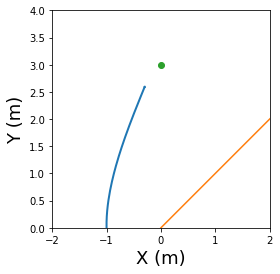

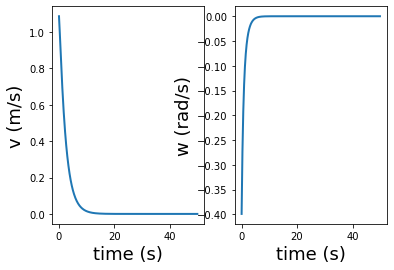

In [8]:
plt.figure
fS = 18
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(np.linspace(0,3,10),np.linspace(0,3,10))
plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-2, 2, 0, 4.0])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.show()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

# Test integration

In [ ]:
x_test = np.zeros_like(x)

In [ ]:
# using for loop
x_test[0,:] = x[0,:]
state_init = x[0,:]
start = time.time()
for i in range(N) :
    state_init = x_test[i,:]
    int_result = solve_ivp(lambda t,x: myModel.forwardDyn(x,u[i,:],idx=t,discrete=False),
                          t_span=(0,0.1),y0=state_init,max_step=1e-2)
    x_test[i+1,:] = int_result.y[:,-1]
print(time.time()-start)

In [ ]:

# parallel integration
def input_by_time(u,t,t_final) :
    if t >= t_final :
        return u[-1,:]
    else :
        return u[int(t*10),:]
t_eval = np.array(range(N+1))*0.1
state_init = x[0,:]
start = time.time()
int_result = solve_ivp(lambda t,x: myModel.forwardDyn(x,input_by_time(u,t,50),idx=t,discrete=False),
                      t_span=(t_eval[0],t_eval[-1]),
                       t_eval = t_eval,
                       y0=state_init,
                       max_step=1e-2,
                      )
x_test_p = int_result.y.transpose()
print(time.time()-start)

In [ ]:
%matplotlib qt
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.plot(np.array(range(N+1))*0.1, x_test[:,0], linewidth=2.0,label='ode')
plt.plot(np.array(range(N+1))*0.1, x_test_p[:,0], linewidth=2.0,label='ode_parallel')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(132)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.plot(np.array(range(N+1))*0.1, x_test[:,1], linewidth=2.0,label='ode')
plt.plot(np.array(range(N+1))*0.1, x_test_p[:,1], linewidth=2.0,label='ode_parallel')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(133)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.plot(np.array(range(N+1))*0.1, x_test[:,2], linewidth=2.0,label='ode')
# plt.plot(np.array(range(N+1))*0.1, x_test_p[:,2], linewidth=2.0,label='ode_parallel')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()